## **PROBLEM STATEMENT**
Credit lending is a core function of the banking and financial services sector, enabling economic growth by providing individuals and businesses with access to capital. But the increase in non-performing loans on which borrowers fail to make scheduled repayments—has become a major challenge. To address this challenge, there is a growing need for data-driven, predictive approaches that analyze client demographics, financial history, behavioral characteristics, and past payment patterns.\
Our objective is to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan; this way, companies can avoid unnecessary losses in incur profits.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
# Load training set
df = pd.read_csv("train.csv")
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 215258 rows × 122 columns


## **Data Understanding:**
*This is where we have a quick look at the dataset*

**Dataset Overview:**: The Credit Scoring training data contains 215258 rows ( each row representing a unique loan record ) and 122 features, including client demographics & information, loan characteristics, income, credit history, assets, residency, and many flags that reflect financial behavior. The goal is binary credit-risk classification: predict if a client will repay the loan (TARGET=0) or face repayment difficulty (TARGET=1)

| **Identification & Loan Characteristics & Target variable** | **Client Demographics & Information** | **Region & Residency Information ( features with suffixes _AVG,_MODE & _MEDI )** | **Other Financial Factor** |
|:--|:--|:--|:--|
| ID | CODE_GENDER | APARTMENTS_ + suffixes| EXT_SOURCE_1 |
| NAME_CONTRACT_TYPE | FLAG_PHONE | BASEMENTAREA_ + suffixes | EXT_SOURCE_2 |
| AMT_INCOME_TOTAL | FLAG_OWN_CAR | YEARS_BEGINEXPLUATATION_ + suffixes | EXT_SOURCE_3 |
| AMT_CREDIT | FLAG_OWN_REALTY | YEARS_BUILD_ + suffixes | OBS_30_CNT_SOCIAL_CIRCLE |
| AMT_ANNUITY | CNT_CHILDREN | COMMONAREA_ + suffixes |DEF_30_CNT_SOCIAL_CIRCLE  |
| AMT_GOODS_PRICE | NAME_INCOME_TYPE | ELEVATORS_ + suffixes |OBS_60_CNT_SOCIAL_CIRCLE |
| NAME_TYPE_SUITE | NAME_EDUCATION_TYPE | ENTRANCES_ + suffixes | DEF_60_CNT_SOCIAL_CIRCLE |
| WEEKDAY_APPR_PROCESS_START | NAME_FAMILY_STATUS  | FLOORSMAX_ + suffixes | FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21 |
| HOUR_APPR_PROCESS_START | NAME_HOUSING_TYPE | FLOORSMIN_ + suffixes | AMT_REQ_CREDIT_BUREAU_HOUR |
| TARGET | REGION_POPULATION_RELATIVE | LANDAREA_ + suffixes | AMT_REQ_CREDIT_BUREAU_DAY |
|  | DAYS_BIRTH | LIVINGAPARTMENTS_ + suffixes |AMT_REQ_CREDIT_BUREAU_WEEK  |
|  | DAYS_EMPLOYED | LIVINGAREA_ + suffixes |AMT_REQ_CREDIT_BUREAU_MON |
|  | DAYS_REGISTRATION | NONLIVINGAPARTMENTS_ + suffixes |AMT_REQ_CREDIT_BUREAU_QRT |
|  | DAYS_ID_PUBLISH | NONLIVINGAREA_ + suffixes | AMT_REQ_CREDIT_BUREAU_YEAR |
|  | OWN_CAR_AGE | FONDKAPREMONT_MODE | |
|  | OCCUPATION_TYPE  | HOUSETYPE_MODE | |
|  | CNT_FAM_MEMBERS | TOTALAREA_MODE | |
|  | ORGANIZATION_TYPE | WALLSMATERIAL_MODE | |
|  | FLAG_MOBIL | EMERGENCYSTATE_MODE | |
|  |FLAG_EMP_PHONE  | REGION_RATING_CLIENT | |
|  | FLAG_WORK_PHONE | REGION_RATING_CLIENT_W_CITY | |
| | FLAG_CONT_MOBILE | REG_REGION_NOT_LIVE_REGION | |
|  | FLAG_PHONE | REG_REGION_NOT_WORK_REGION | | 
|  | FLAG_EMAIL | LIVE_REGION_NOT_WORK_REGION | |
|  | DAYS_LAST_PHONE_CHANGE | REG_CITY_NOT_LIVE_CITY | |
|  |  | REG_CITY_NOT_WORK_CITY | |
|  |  | LIVE_CITY_NOT_WORK_CITY | |

##### **Identification & Loan Characteristics:**
* ID: Unique identifier for each loan application
* NAME_CONTRACT_TYPE: Identification if loan is cash or revolving.
* AMT_INCOME_TOTAL: Income of the client.
* AMT_CREDIT: Credit amount of the loan. 
* AMT_ANNUITY: Loan annuity (amount to be paid periodically).
* AMT_GOODS_PRICE: For consumer loans, it is the price of the goods for which the loan is given.
* NAME_TYPE_SUITE: Who was accompanying the client when they applied for the loan
* WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan.
* HOUR_APPR_PROCESS_START: Approximately at what hour did the client apply for the loan.
* TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",

#### **Client Demographics & Information**
* CODE_GENDER: Gender of the client
* FLAG_OWN_CAR: Flag if the client owns a car.
* FLAG_OWN_REALTY: Flag if the client owns a house or flat
* CNT_CHILDREN: Number of children the client has. 
* NAME_INCOME_TYPE: Client's income type (businessman, working, maternity leave, etc.).
* NAME_EDUCATION_TYPE: Level of highest education the client achieved.
* NAME_FAMILY_STATUS: Family status of the client
* NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...).
* REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in a more populated area).
* DAYS_BIRTH: Client's age in days at the time of application (values are negative).
* DAYS_EMPLOYED: How many days before the application the person started current employment (values are negative).
* DAYS_REGISTRATION: How many days before the application did client change his registration.
* DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan.
* OWN_CAR_AGE: Age of client's car.
* OCCUPATION_TYPE: What kind of occupation does the client have.
* CNT_FAM_MEMBERS: How many family members does the client have.
* ORGANIZATION_TYPE: Type of organization where client works.
* FLAG_MOBIL: Did the client provide a mobile phone number (1=YES, 0=NO).
* FLAG_EMP_PHONE: Did the client provide an employer phone number.
* FLAG_WORK_PHONE: Did the client provide a work phone number.
* FLAG_CONT_MOBILE: Was the mobile phone reachable.
* FLAG_WORK_PHONE: Did the client provide a work phone number. 
* FLAG_CONT_MOBILE: Was the mobile phone reachable.
* FLAG_PHONE: Did the client provide a home phone number.
* FLAG_EMAIL: Did the client provide an email address
* DAYS_LAST_PHONE_CHANGE: How many days before the application did the client change phone.

#### **Region & Residency information**
* REGION_RATING_CLIENT: Our rating of the region where the client lives (1, 2, or 3).
* REGION_RATING_CLIENT_W_CITY: Our rating of the region where the client lives with taking city into account (1, 2, or 3).
* REG_REGION_NOT_LIVE_REGION: Flag if client's permanent address does not match contact address (within same region).
* REG_REGION_NOT_WORK_REGION: Flag if client's permanent address does not match work address (within same region).
* LIVE_REGION_NOT_WORK_REGION: Flag if client's contact address does not match work address (within same region).
* REG_CITY_NOT_LIVE_CITY: Flag if client's permanent address does not match contact address (within same city).
* REG_CITY_NOT_WORK_CITY: Flag if client's permanent address does not match work address (within same city).
* LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address (within same city).

##### *The features below contain normalized information about the building where the client lives. The suffixes _AVG, _MODE, and _MEDI represent the average, mode, and median values, respectively.*

* APARTMENTS_: Information about building where the client lives.
* BASEMENTAREA_: information about building where the client lives.
* YEARS_BEGINEXPLUATATION_: information about building where the client lives.
* YEARS_BUILD_: information about building where the client lives.
* COMMONAREA_:  information about building where the client lives.
* ELEVATORS_: information about building where the client lives. 
* ENTRANCES_: information about building where the client lives.
* FLOORSMAX_: information about building where the client lives. 
* FLOORSMIN_: information about building where the client lives.
* LANDAREA_: information about building where the client lives.
* LIVINGAPARTMENTS_: information about building where the client lives.
* LIVINGAREA_: information about building where the client lives.
* NONLIVINGAPARTMENTS_: information about building where the client lives.
* NONLIVINGAREA_: information about building where the client lives.

#### **Other Financial Factors**
* EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: Normalized scores from external data sources (e.g., credit bureaus). 
* OBS_30_CNT_SOCIAL_CIRCLE: How many observations of client's social surroundings with observable 30 DPD (days past due) default.
* DEF_30_CNT_SOCIAL_CIRCLE: How many observations of client's social surroundings defaulted on 30 DPD (days past due).
* OBS_60_CNT_SOCIAL_CIRCLE: Same as above but for 60 days.
* DEF_60_CNT_SOCIAL_CIRCLE: Same as above but for 60 days.
* FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21: Did client provide document X (various types of documents).
* AMT_REQ_CREDIT_BUREAU_HOUR: Number of enquiries to Credit Bureau about the client one hour before application.
* AMT_REQ_CREDIT_BUREAU_DAY: Number of enquiries to Credit Bureau about the client one day before application.
* AMT_REQ_CREDIT_BUREAU_WEEK: Number of enquiries to Credit Bureau about the client one week before application.
* AMT_REQ_CREDIT_BUREAU_MON: Number of enquiries to Credit Bureau about the client one month before application.
* AMT_REQ_CREDIT_BUREAU_QRT: Number of enquiries to Credit Bureau about the client 3 months before application.
* AMT_REQ_CREDIT_BUREAU_YEAR: Number of enquiries to Credit Bureau about the client one year before application.


### **Dataset Information & Structure**

In [81]:
print("Column Names and Data Types:")
for col in df.columns:
    print(f"{col:30} : {str(df[col].dtype):15}")

Column Names and Data Types:
ID                             : int64          
TARGET                         : int64          
NAME_CONTRACT_TYPE             : object         
CODE_GENDER                    : object         
FLAG_OWN_CAR                   : object         
FLAG_OWN_REALTY                : object         
CNT_CHILDREN                   : int64          
AMT_INCOME_TOTAL               : float64        
AMT_CREDIT                     : float64        
AMT_ANNUITY                    : float64        
AMT_GOODS_PRICE                : float64        
NAME_TYPE_SUITE                : object         
NAME_INCOME_TYPE               : object         
NAME_EDUCATION_TYPE            : object         
NAME_FAMILY_STATUS             : object         
NAME_HOUSING_TYPE              : object         
REGION_POPULATION_RELATIVE     : float64        
DAYS_BIRTH                     : int64          
DAYS_EMPLOYED                  : int64          
DAYS_REGISTRATION              : float64

In [82]:
print(df.dtypes.value_counts())

float64    65
int64      41
object     16
Name: count, dtype: int64


In [ ]:
# Unique class mỗi column
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

As we can see, the dataset includes a mix of categorical and numeric fields. Only 16 features are string-valued categorical variables. The remaining 106 columns are numeric (integers or floats). We can see it more clearly here:

In [84]:
print("Numerical Features:")
df.describe()

Numerical Features:


,ID,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,215258.00000,215258.000000,215258.000000,2.152580e+05,2.152580e+05,215249.000000,2.150840e+05,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,73154.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215256.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.00000,215258.000000,215258.000000,215258.000000,215258.000000,93829.000000,2.147830e+05,172510.000000,105929.000000,89186.000000,110231.000000,72110.000000,64758.000000,100481.000000,106822.000000,108105.000000,69181.000000,87369.000000,68083.000000,107166.000000,65803.000000,96432.000000,105929.000000,89186.000000,110231.000000,72110.000000,64758.000000,100481.000000,106822.000000,108105.000000,69181.000000,87369.000000,68083.000000,107166.000000,65803.000000,96432.000000,105929.000000,89186.000000,110231.000000,72110.000000,64758.000000,100481.000000,106822.000000,108105.000000,69181.000000,87369.000000,68083.000000,107166.000000,65803.000000,96432.000000,111317.000000,214546.000000,214546.000000,214546.000000,214546.000000,215257.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,186186.000000,186186.000000,186186.000000,186186.000000,186186.000000,186186.000000
mean,107628.50000,0.080731,0.417076,1.688900e+05,5.994893e+05,27125.796166,5.387622e+05,0.020869,-16037.328169,63865.074181,-4985.649732,-2994.077725,12.073502,0.999995,0.819751,0.199119,0.998044,0.280366,0.056867,2.153362,2.052885,2.031883,12.064764,0.015200,0.05079,0.040417,0.078125,0.230588,0.179566,0.501568,5.140282e-01,0.510706,0.117377,0.088484,0.977673,0.752469,0.044679,0.078687,0.149802,0.226015,0.231711,0.066284,0.100669,0.107308,0.008877,0.028265,0.114129,0.087550,0.976982,0.759686,0.042601,0.074196,0.145249,0.222090,0.227979,0.064906,0.105483,0.105853,0.008137,0.026958,0.117740,0.087962,0.977697,0.755752,0.044624,

In [85]:
print("Categorical Features:")
df.describe(include=['object'])

Categorical Features:


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,215258,215258,215258,215258,214376,215258,215258,215258,215258,147594,215258,215258,68040,107159,105767,113212
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,194860,141571,142102,149270,173985,111204,152933,137714,191154,38656,37724,47863,51659,105304,46219,111611


### **Distribution of the Target Column:**






In [86]:
print(df.TARGET.value_counts())

TARGET
0    197880
1     17378
Name: count, dtype: int64


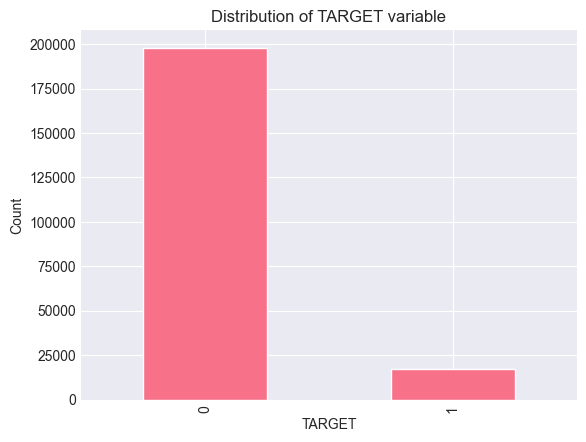

Percentage of clients with payment difficulties is: 8.07%


In [87]:
df.TARGET.value_counts().plot(kind='bar', title='Distribution of TARGET variable')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()
print(f'Percentage of clients with payment difficulties is: {df.TARGET.sum() / df.shape[0] * 100 :.2f}%')

.... Other plot about....

As we can see from the plot, the majority are repaid loans and there is only 8.07% of clients who has payment difficulties. Thus an imbalance in the distribution of the TARGET variable.

## **Missing Values Analysis**

                      Column  Missing Value Count  Missing Percentage
             COMMONAREA_MEDI               150500               69.92
              COMMONAREA_AVG               150500               69.92
             COMMONAREA_MODE               150500               69.92
    NONLIVINGAPARTMENTS_MEDI               149455               69.43
    NONLIVINGAPARTMENTS_MODE               149455               69.43
     NONLIVINGAPARTMENTS_AVG               149455               69.43
          FONDKAPREMONT_MODE               147218               68.39
       LIVINGAPARTMENTS_MODE               147175               68.37
       LIVINGAPARTMENTS_MEDI               147175               68.37
        LIVINGAPARTMENTS_AVG               147175               68.37
              FLOORSMIN_MODE               146077               67.86
              FLOORSMIN_MEDI               146077               67.86
               FLOORSMIN_AVG               146077               67.86
            YEARS_BU

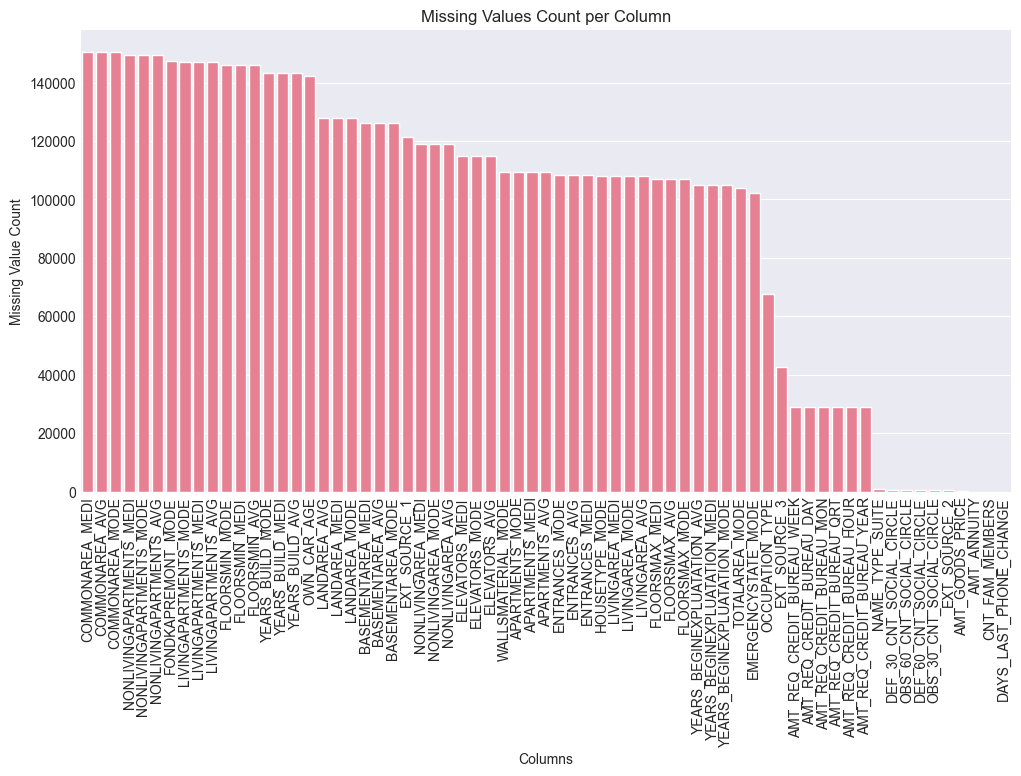

In [116]:
missing_values = pd.DataFrame({
    'Column': df.columns,
    'Missing Value Count': df.isnull().sum().values,
    'Missing Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_values = missing_values[missing_values['Missing Value Count'] > 0].sort_values('Missing Value Count', ascending=False)

if len(missing_values) > 0:
    print(missing_values.to_string(index=False))
else:
    print("No missing values found in the dataset!")
    
# Tạo bảng missing values
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='Missing Value Count', data=missing_values)
plt.xticks(rotation=90)
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.show()

In [133]:
# Xem số cột có missing values + tổng số missing values + % missing values
print(f"Columns with Missing Values: {len(missing_values)} out of {df.shape[1]}")
total_missing_values = df.isnull().sum().sum() 
total_cells = df.size 
missing_percentage = (total_missing_values / total_cells) * 100  
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")

Columns with Missing Values: 67 out of 122
Percentage of Missing Values: 22.37%


### **Duplicate Values**

In [117]:
print("Duplicate Values:")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {(duplicate_count/len(df)*100):.2f}%")

if duplicate_count > 0:
    print("\nSample of duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))

Duplicate Values:
Number of duplicate rows: 0
Percentage of duplicates: 0.00%
Number of duplicate rows: 0
Percentage of duplicates: 0.00%


### **Outliers Detection (Box Plots)**

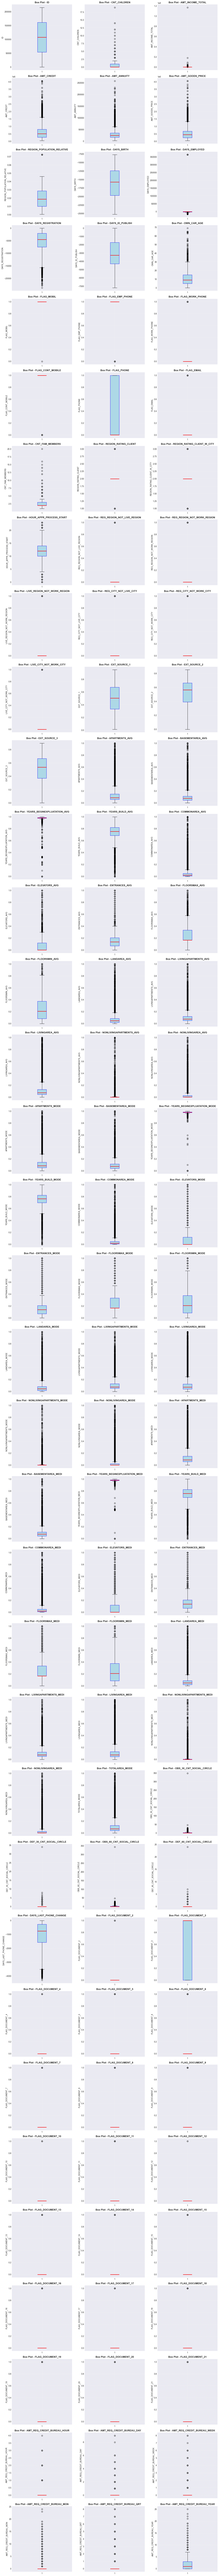

In [93]:
# Dùng boxplot để phân tích outlier
if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(numerical_cols) > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', color='blue'),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'Box Plot - {col}', fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)
    
    # Ẩn các subplot thừa
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")

### **Correlation Analysis**

In [128]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))
correlations = df.corr()['TARGET'].sort_values()

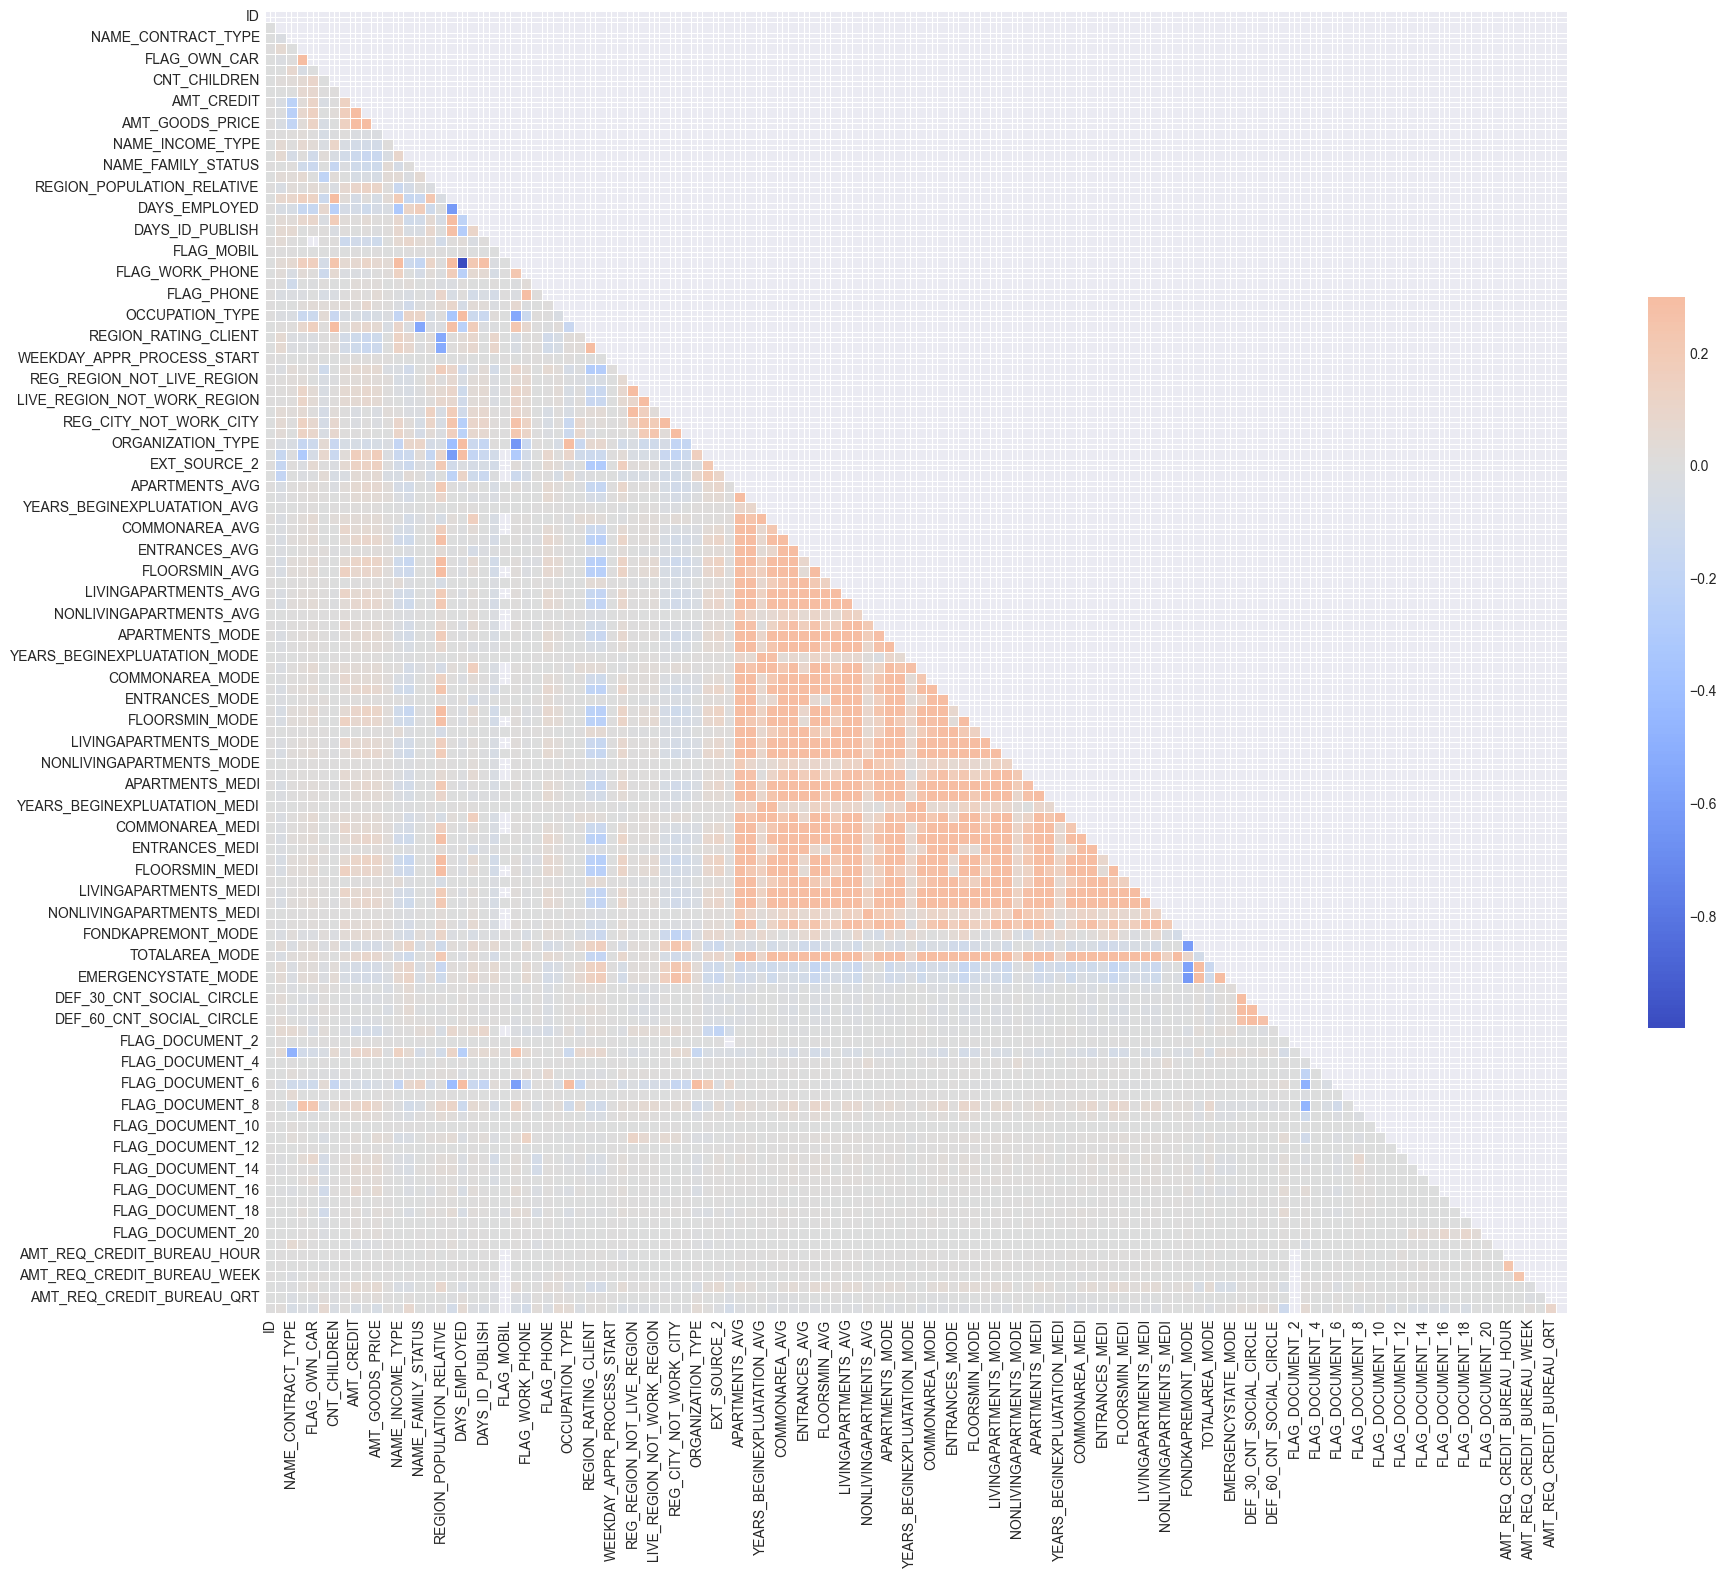

In [132]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(21, 19))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
